In [19]:
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.losses import MeanSquaredError,Huber,MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [20]:
#importar datos
train = pd.read_csv('train.csv')
tdata = tf.constant(pd.read_csv('train.csv'))
tdata = tf.cast(tdata,dtype=tf.dtypes.float32)
tdata = tf.random.shuffle(tdata)#Mezcla los datos
X = tdata[:,3:-1]
Y = tdata[:,-1]
Y = tf.expand_dims(Y, axis = -1)
n = int(0.8 * X.shape[0])  # 80% para entrenamiento
X_train, X_test = X[:n], X[n:]
y_train, y_test = Y[:n], Y[n:]
print(X.shape)
print(Y.shape)

(1000, 8)
(1000, 1)


In [21]:
#Exploracion
train.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [23]:
train.isnull().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [24]:
train.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [25]:
#sns.pairplot(data=train, hue="years", palette="Set2")

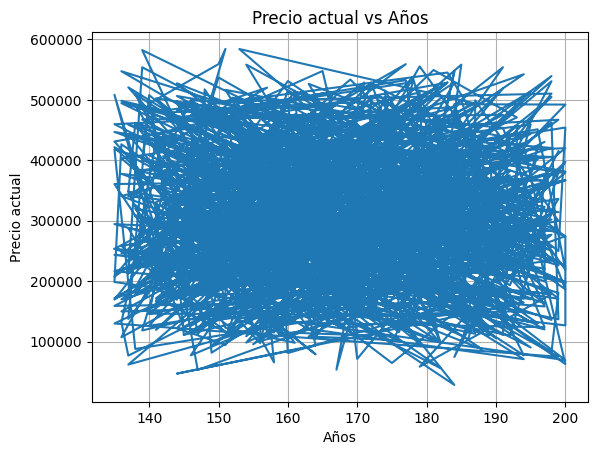

In [26]:
plt.plot(train["top speed"], train["current price"])
plt.title("Precio actual vs Años")
plt.xlabel("Años")
plt.ylabel("Precio actual")
plt.grid(True)
plt.show()

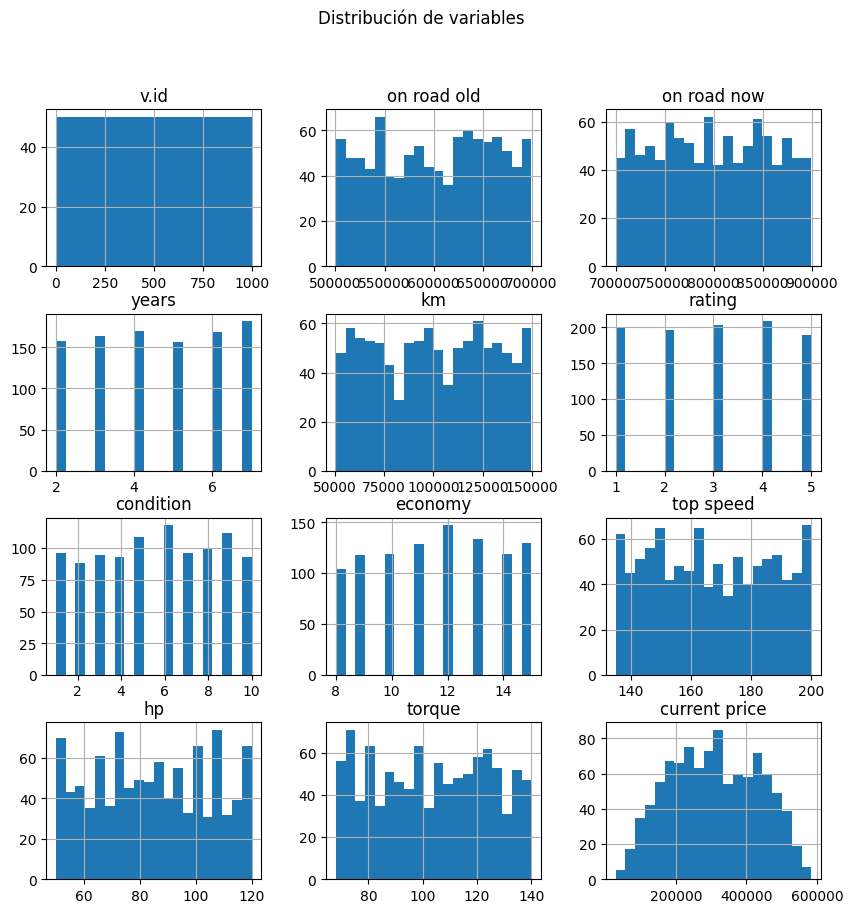

In [27]:
train.hist(figsize=(10,10), bins=20)
plt.suptitle("Distribución de variables")
plt.show()

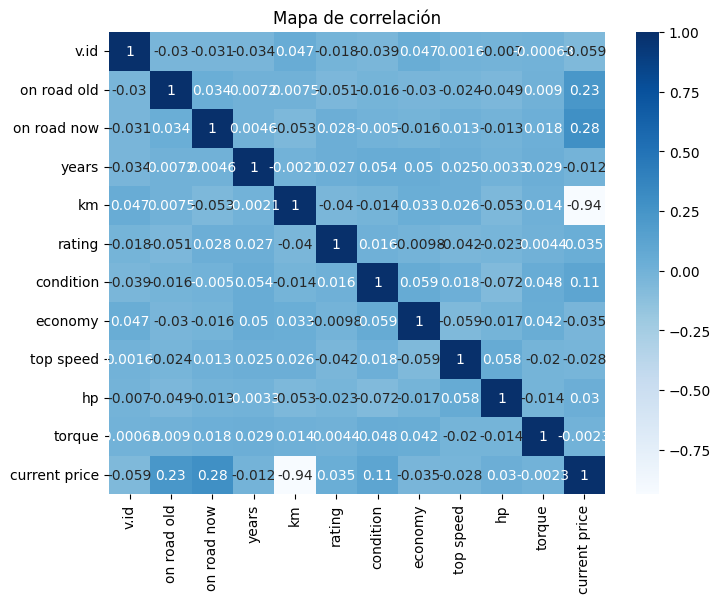

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), annot=True, cmap='Blues')
plt.title("Mapa de correlación")
plt.show()

In [29]:
#Modelo
normalizer = Normalization() #Normalizador
normalizer.adapt(X)
input_dim = X.shape[1]
model = tf.keras.Sequential([
    InputLayer(input_shape=(input_dim,)),
    normalizer,
    Dense(1)
], name="Mi_primer_modelo")
model.summary()

Model: "Mi_primer_modelo"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


In [30]:
#Sancionamiento por errores
y_true = [1,0]
x_pred = [1,1]
mse = tf.keras.losses.MeanSquaredError()
mse(y_true,x_pred).numpy()

0

In [31]:
model.compile(optimizer=Adam(learning_rate=0.01),
            loss=MeanAbsoluteError(),
            metrics=[RootMeanSquaredError()])


In [32]:
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/500


25/25 [==============================] - 1s 10ms/step - loss: 306880.9062 - root_mean_squared_error: 332041.2500 - val_loss: 315076.9062 - val_root_mean_squared_error: 338097.3750
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 306880.6250 - root_mean_squared_error: 332041.0312 - val_loss: 315076.6562 - val_root_mean_squared_error: 338097.1562
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 306880.3750 - root_mean_squared_error: 332040.8125 - val_loss: 315076.4375 - val_root_mean_squared_error: 338096.9375
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 306880.1250 - root_mean_squared_error: 332040.5625 - val_loss: 315076.1875 - val_root_mean_squared_error: 338096.7188
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 306879.8750 - root_mean_squared_error: 332040.3438 - val_loss: 315075.9062 - val_root_mean_squared_error: 338096.4688
Epoch 6/500
25/25 [==============================] - 0s 

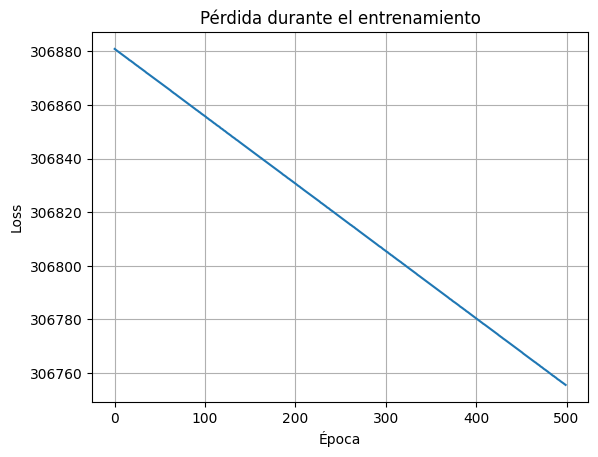

In [33]:
plt.plot(history.history["loss"])
plt.title("Pérdida durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [34]:
loss, rmse = model.evaluate(X_test, y_test, verbose=1)
print(f"Error medio absoluto: {loss:.2f}")
print(f"Raíz del error cuadrático medio: {rmse:.2f}")


7/7 [==============================] - 0s 2ms/step - loss: 314954.5938 - root_mean_squared_error: 337985.6562
Error medio absoluto: 314954.59
Raíz del error cuadrático medio: 337985.66


In [35]:
# Tomamos la primera fila del set de prueba (solo X, sin Y)
ejemplo = X_test[:1]  # forma (1, n_features)

# Valor real
valor_real = y_test[:1].numpy()[0][0]

# Predicción
prediccion = model.predict(ejemplo)[0][0]

print(f"Valor real: {valor_real:.2f}")
print(f"Predicción: {prediccion:.2f}")


1/1 [==============================] - 0s 57ms/step
Valor real: 488457.00
Predicción: 110.01
